# Reducing Traffic Mortality
## Project Description
While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing. By looking at the demographics of traffic accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?

# Import all libaries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

print('Libraries are imported Sucessfully !')

Libraries are imported Sucessfully !


# The raw data files and their format

### Check the name of the current folder

In [ ]:
pwd

'C:\\Users\\Nihar\\Desktop\\Machine learning\\Machine_Learning_Task'

### List all files in this folder

In [ ]:
ls

 Volume in drive C is WIN11
 Volume Serial Number is 2E6E-030A

 Directory of C:\Users\Nihar\Desktop\Machine learning\Machine_Learning_Task

17-02-2023  17:43    <DIR>          .
17-02-2023  15:38    <DIR>          ..
17-02-2023  15:38    <DIR>          .ipynb_checkpoints
16-02-2023  23:44               828 miles-driven.csv
16-02-2023  23:44           276,955 Reducing Traffic Mortality.pdf
17-02-2023  17:43           853,960 reducing_traffic_mortality.ipynb
16-02-2023  23:44             2,007 road-accidents.csv
               4 File(s)      1,133,750 bytes
               3 Dir(s)  269,731,078,144 bytes free


In [ ]:
# Import road_accident dataset
df = pd.read_csv('road-accidents.csv',skiprows=[0,1,2,3,4,5,6,7,8],sep='|')
df

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [ ]:
# import miles_driven datasets
df1 = pd.read_csv('miles-driven.csv',sep='|')
df1

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784
5,Colorado,46606
6,Connecticut,31197
7,Delaware,9028
8,District of Columbia,3568
9,Florida,191855


In [ ]:
df1.columns

Index(['state', 'million_miles_annually'], dtype='object')

In [ ]:
# Merging both the datasets

df_final = pd.merge(df,df1,on='state')

In [ ]:
df_final

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784
5,Colorado,13.6,37,28,95,46606
6,Connecticut,10.8,46,36,82,31197
7,Delaware,16.2,38,30,99,9028
8,District of Columbia,5.9,34,27,100,3568
9,Florida,17.9,21,29,94,191855


# Read in and get an overview of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull().sum()

state                   0
drvr_fatl_col_bmiles    0
perc_fatl_speed         0
perc_fatl_alcohol       0
perc_fatl_1st_time      0
dtype: int64

### No missing value presnt in the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
drvr_fatl_col_bmiles,51.0,15.790196,4.122002,5.9,12.75,15.6,18.5,23.9
perc_fatl_speed,51.0,31.725490,9.633438,13.0,23.00,34.0,38.0,54.0
perc_fatl_alcohol,51.0,30.686275,5.132213,16.0,28.00,30.0,33.0,44.0
perc_fatl_1st_time,51.0,88.725490,6.960110,76.0,83.50,88.0,95.0,100.0


In [ ]:
df.shape

(51, 5)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time'],
      dtype='object')

# Create a textual and a graphical summary of the data
## Univariate Analysis

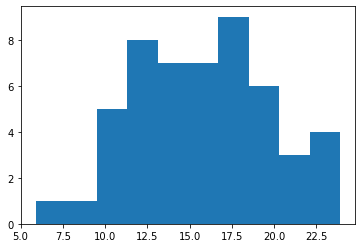

In [ ]:
plt.hist(df.drvr_fatl_col_bmiles)
plt.show()

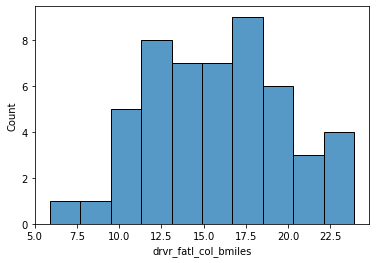

In [ ]:
sns.histplot(df.drvr_fatl_col_bmiles,bins=10)
plt.show()

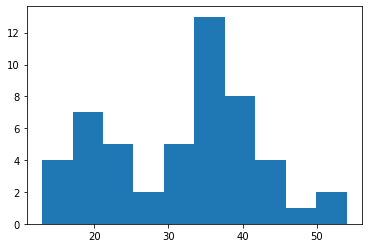

In [ ]:
plt.hist(df.perc_fatl_speed)
plt.show()

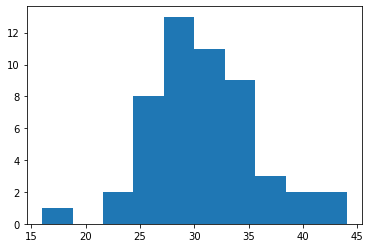

In [ ]:
plt.hist(df.perc_fatl_alcohol)
plt.show()

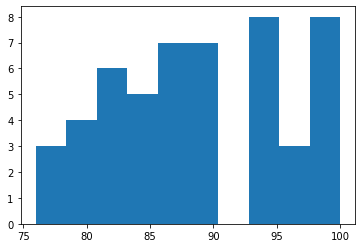

In [ ]:
plt.hist(df.perc_fatl_1st_time)
plt.show()

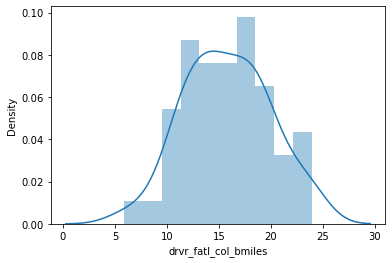

In [ ]:
sns.distplot(df.drvr_fatl_col_bmiles,bins=10)
plt.show()

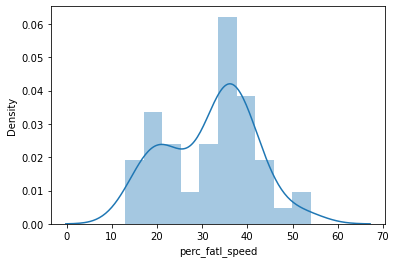

In [ ]:
sns.distplot(df.perc_fatl_speed,bins=10)
plt.show()

In [ ]:
df.perc_fatl_speed.skew()

-0.12730925206613722

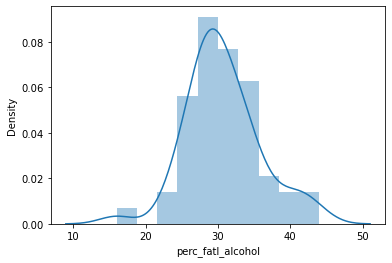

In [ ]:
sns.distplot(df.perc_fatl_alcohol,bins=10)
plt.show()

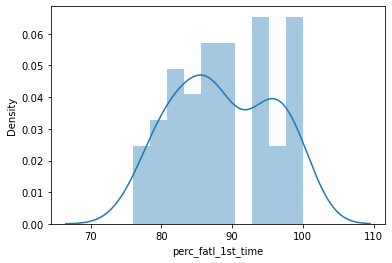

In [ ]:
sns.distplot(df.perc_fatl_1st_time,bins=10)
plt.show()

In [ ]:
df.perc_fatl_1st_time.skew()

0.041968091940393554

<AxesSubplot:xlabel='drvr_fatl_col_bmiles'>

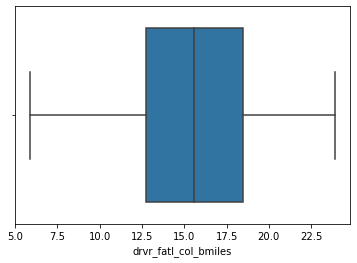

In [ ]:
sns.boxplot(df.drvr_fatl_col_bmiles)

<AxesSubplot:xlabel='perc_fatl_speed'>

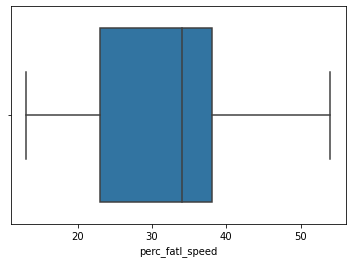

In [ ]:
sns.boxplot(df.perc_fatl_speed)

<AxesSubplot:xlabel='perc_fatl_1st_time'>

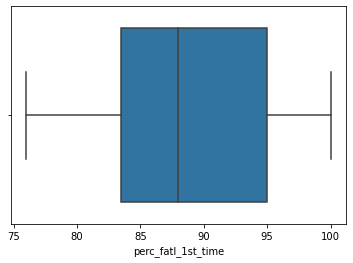

In [ ]:
sns.boxplot(df.perc_fatl_1st_time)

## No outlier present in the data and the data is normally distributed


In [ ]:
df.columns

Index(['state', 'drvr_fatl_col_bmiles', 'perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time'],
      dtype='object')

<AxesSubplot:xlabel='perc_fatl_speed', ylabel='drvr_fatl_col_bmiles'>

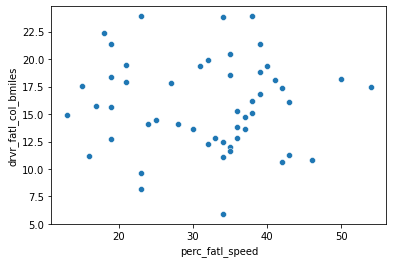

In [ ]:
sns.scatterplot(x='perc_fatl_speed',y='drvr_fatl_col_bmiles',data=df)

<AxesSubplot:xlabel='perc_fatl_alcohol', ylabel='drvr_fatl_col_bmiles'>

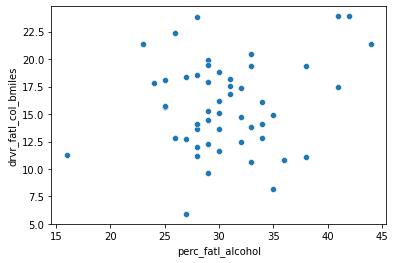

In [ ]:
sns.scatterplot(x='perc_fatl_alcohol',y='drvr_fatl_col_bmiles',data=df)

<AxesSubplot:xlabel='perc_fatl_1st_time', ylabel='drvr_fatl_col_bmiles'>

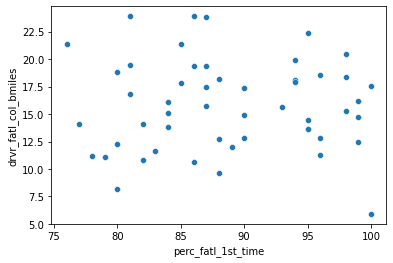

In [ ]:
sns.scatterplot(x='perc_fatl_1st_time',y='drvr_fatl_col_bmiles',data=df)

## There are no linear realtionship between input column with output column

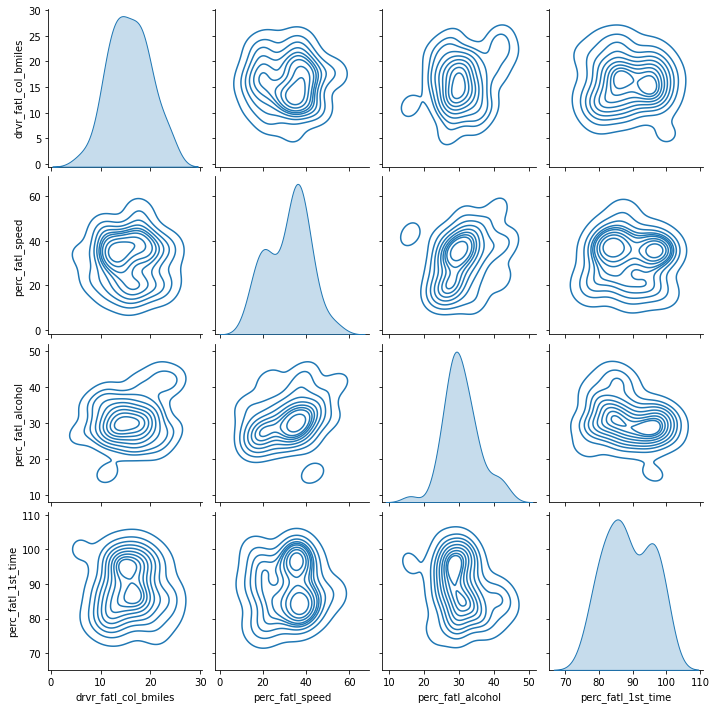

In [ ]:
sns.pairplot(df,kind='kde')

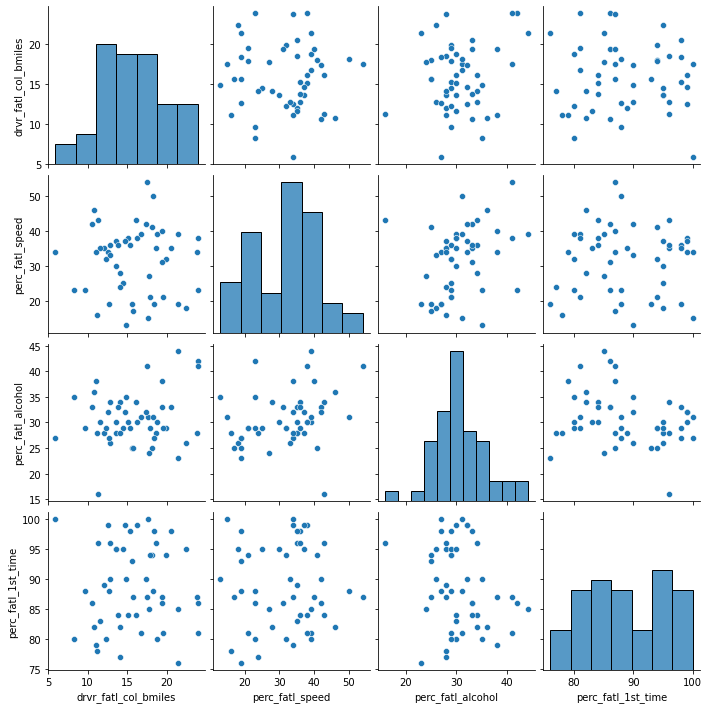

In [ ]:
sns.pairplot(df)

# Quantify the association of features and accidents

In [ ]:
# pearson correlation
df.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [ ]:
# Spearman correlation
df.corr(method='spearman')

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.017217,0.051443,0.019329
perc_fatl_speed,-0.017217,1.000000,0.367672,-0.001066
perc_fatl_alcohol,0.051443,0.367672,1.000000,-0.216699
perc_fatl_1st_time,0.019329,-0.001066,-0.216699,1.000000


- from the above correlation table we can conclude that person consuming alcohol are facing more fatal accident

In [ ]:
df

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89
5,Colorado,13.6,37,28,95
6,Connecticut,10.8,46,36,82
7,Delaware,16.2,38,30,99
8,District of Columbia,5.9,34,27,100
9,Florida,17.9,21,29,94


In [ ]:
def calc_vif(X):
    '''This function will calculate VIF factor between all feature, 
       to check multicollinearity'''
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(4)]

    return(vif)

calc_vif(df.iloc[:,1:])

,variables,VIF
0,drvr_fatl_col_bmiles,16.466451
1,perc_fatl_speed,13.354546
2,perc_fatl_alcohol,34.091624
3,perc_fatl_1st_time,33.209866


In [ ]:
y = df.iloc[:,1]
X = df.iloc[:,2:]

In [ ]:
y.head()

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
Name: drvr_fatl_col_bmiles, dtype: float64

# Fit a multivariate linear regression

In [ ]:
# fit the data with multiple linaer regression to find coefficient/ weightage of each feature
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [ ]:
lr.coef_

array([-0.04180041,  0.19086404,  0.02473301])

- from multivariate fit, Coefficient person consuming alcohol are high.

In [ ]:
r2_score(y,lr.predict(X))

0.04948335303515394

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

# Perform PCA on standardized data

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

# Visualize the first two principal components

<AxesSubplot:>

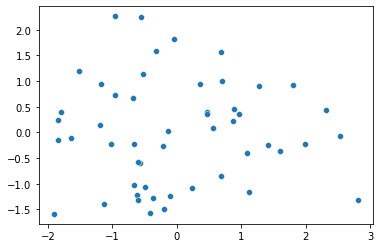

In [ ]:
sns.scatterplot(x= X_pca[:,0], y= X_pca[:,1])

- Two PCA shows no uniform realtion between them

# Find clusters of similar states in the data

In [ ]:
X_pca

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X_pca)
    wcss.append(km.inertia_)

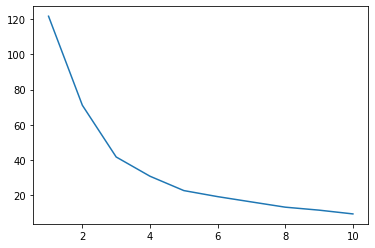

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(X_pca)

In [ ]:
y_mean

array([2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 0, 2, 1, 2, 2])

# KMeans to visualize clusters in the PCA scatter plot

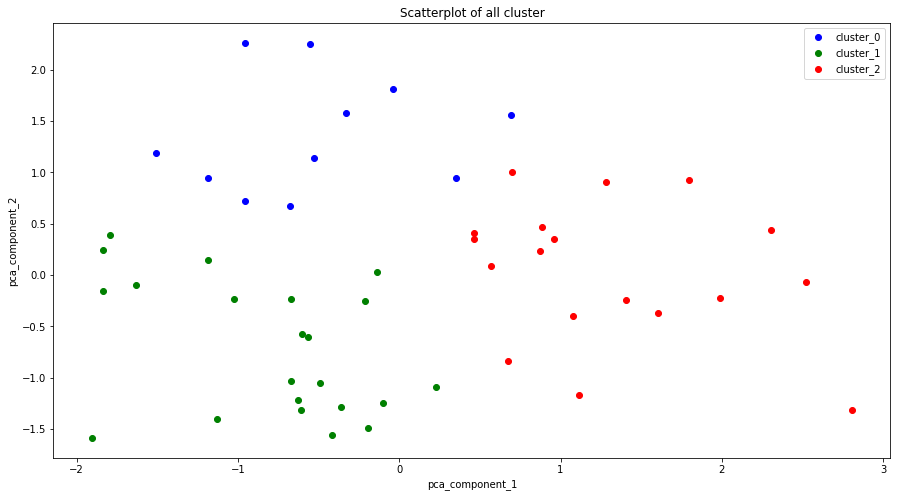

In [ ]:
# scatter plot of pca component with different cluster
plt.figure(figsize=(15,8))
plt.scatter( X_pca[y_mean==0,0], X_pca[y_mean==0,1],c='b',label='cluster_0')
plt.scatter( X_pca[y_mean==1,0], X_pca[y_mean==1,1],c='g',label='cluster_1')
plt.scatter( X_pca[y_mean==2,0], X_pca[y_mean==2,1],c='r',label='cluster_2')
plt.title('Scatterplot of all cluster')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()

In [ ]:
df_final['cluster'] = y_mean

In [ ]:
df_final

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster
0,Alabama,18.8,39,30,80,64914,2
1,Alaska,18.1,41,25,94,4593,1
2,Arizona,18.6,35,28,96,59575,1
3,Arkansas,22.4,18,26,95,32953,1
4,California,12.0,35,28,89,320784,1
5,Colorado,13.6,37,28,95,46606,1
6,Connecticut,10.8,46,36,82,31197,2
7,Delaware,16.2,38,30,99,9028,1
8,District of Columbia,5.9,34,27,100,3568,1
9,Florida,17.9,21,29,94,191855,1


### Using masking we divide each cluster into different groups

In [ ]:
mask_1 = df_final['cluster'] == 0

state_cluster_1 = df_final[mask_1]
state_cluster_1 

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster
15,Iowa,15.7,17,25,87,31274,0
16,Kansas,17.8,27,24,85,30021,0
17,Kentucky,21.4,19,23,76,48061,0
21,Massachusetts,8.2,23,35,80,54792,0
22,Michigan,14.1,24,28,77,94754,0
23,Minnesota,9.6,23,29,88,56685,0
27,Nebraska,14.9,13,35,90,19093,0
30,New Jersey,11.2,16,28,78,73094,0
32,New York,12.3,32,29,80,127726,0
42,Tennessee,19.5,21,29,81,70751,0


In [ ]:
mask_2 = df_final['cluster'] == 1

state_cluster_2 = df_final[mask_2]
state_cluster_2 

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster
1,Alaska,18.1,41,25,94,4593,1
2,Arizona,18.6,35,28,96,59575,1
3,Arkansas,22.4,18,26,95,32953,1
4,California,12.0,35,28,89,320784,1
5,Colorado,13.6,37,28,95,46606,1
7,Delaware,16.2,38,30,99,9028,1
8,District of Columbia,5.9,34,27,100,3568,1
9,Florida,17.9,21,29,94,191855,1
10,Georgia,15.6,19,25,93,108454,1
12,Idaho,15.3,36,29,98,15937,1


In [ ]:
mask_3 = df_final['cluster'] == 2

state_cluster_3 = df_final[mask_3]
state_cluster_3 

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster
0,Alabama,18.8,39,30,80,64914,2
6,Connecticut,10.8,46,36,82,31197,2
11,Hawaii,17.5,54,41,87,10066,2
19,Maine,15.1,38,30,84,14248,2
25,Missouri,16.1,43,34,84,68789,2
26,Montana,21.4,39,44,85,11660,2
29,New Hampshire,11.6,35,30,83,12720,2
33,North Carolina,16.8,39,31,81,103772,2
34,North Dakota,23.9,23,42,86,9131,2
35,Ohio,14.1,28,34,82,111990,2


# Visualize the feature differences between the clusters

In [ ]:
# create dataframe from for cluster visulization
df['cluster'] = y_mean
df_cluster_viz = df.iloc[:,2:]
df_cluster_viz

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,39,30,80,2
1,41,25,94,1
2,35,28,96,1
3,18,26,95,1
4,35,28,89,1
5,37,28,95,1
6,46,36,82,2
7,38,30,99,1
8,34,27,100,1
9,21,29,94,1


In [ ]:
df.shape

(51, 6)

In [ ]:
# WE create new data frame using pandas melt function on cluster with 3 input column. 
# So to number of row = # cluster * # features = 3 * 51 = 153

cluster_measurement = pd.melt(df, id_vars='cluster', 
                   var_name='measurement', 
                   value_name='percent', 
                   value_vars=df_cluster_viz.iloc[:,:-1])

cluster_measurement

,cluster,measurement,percent
0,2,perc_fatl_speed,39
1,1,perc_fatl_speed,41
2,1,perc_fatl_speed,35
3,1,perc_fatl_speed,18
4,1,perc_fatl_speed,35
...,...,...,...
148,0,perc_fatl_1st_time,88
149,2,perc_fatl_1st_time,86
150,1,perc_fatl_1st_time,87
151,2,perc_fatl_1st_time,84


In [ ]:
# or 
cluster_measurement = df_cluster_viz.melt(id_vars='cluster',var_name='measurement', 
                   value_name='percent')
cluster_measurement

,cluster,measurement,percent
0,2,perc_fatl_speed,39
1,1,perc_fatl_speed,41
2,1,perc_fatl_speed,35
3,1,perc_fatl_speed,18
4,1,perc_fatl_speed,35
...,...,...,...
148,0,perc_fatl_1st_time,88
149,2,perc_fatl_1st_time,86
150,1,perc_fatl_1st_time,87
151,2,perc_fatl_1st_time,84


<AxesSubplot:xlabel='percent', ylabel='measurement'>

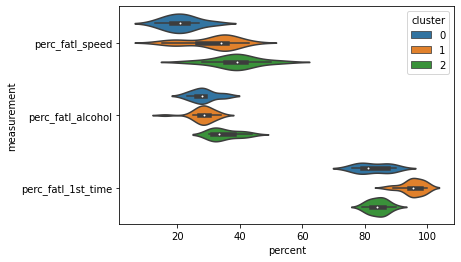

In [ ]:
# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x = cluster_measurement['percent'], y = cluster_measurement['measurement'], hue = cluster_measurement['cluster'])

# Compute the number of accidents within each cluster

In [ ]:
# creating a column  number of driver made accident
df_final['no_drvr_fatal'] = df_final['drvr_fatl_col_bmiles']*(df_final['million_miles_annually']/1000)

In [ ]:
df_final

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,cluster,no_drvr_fatal
0,Alabama,18.8,39,30,80,64914,2,1220.3832
1,Alaska,18.1,41,25,94,4593,1,83.1333
2,Arizona,18.6,35,28,96,59575,1,1108.0950
3,Arkansas,22.4,18,26,95,32953,1,738.1472
4,California,12.0,35,28,89,320784,1,3849.4080
5,Colorado,13.6,37,28,95,46606,1,633.8416
6,Connecticut,10.8,46,36,82,31197,2,336.9276
7,Delaware,16.2,38,30,99,9028,1,146.2536
8,District of Columbia,5.9,34,27,100,3568,1,21.0512
9,Florida,17.9,21,29,94,191855,1,3434.2045


In [ ]:
# counting of number of accient in each cluster using groupby function
num_acc_cluster = df_final.groupby('cluster')['no_drvr_fatal'].agg(['count','mean','sum'])
num_acc_cluster 

,count,mean,sum
cluster,,,
0,11,860.505945,9465.5654
1,22,898.378595,19764.3291
2,18,911.406439,16405.3159


<AxesSubplot:xlabel='cluster', ylabel='no_drvr_fatal'>

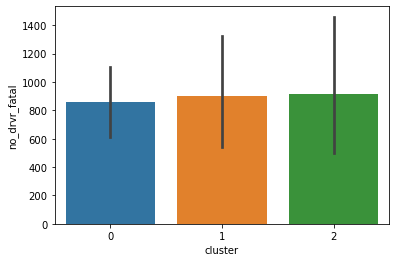

In [ ]:
# Creating a barplot of the average number of accidents per cluster
sns.barplot(df_final['cluster'],df_final['no_drvr_fatal'])

# Make a decision when there is no clear right choice

-  From the above count and as per the cluster mean value the ideal clusters would be cluster 1 and cluster 2 